In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cluster_0 = pd.read_csv('cluster_0.csv',encoding='utf-8')
cluster_3 = pd.read_csv('cluster_3.csv',encoding='utf-8')

In [3]:
cluster_0.head(10)

,Unnamed: 0,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,DLVPREARRBRANCD,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,cluster_id
0,0,0,7,20210303,35510,22400.0,134265392,1,14900.0,1.0,7484,5Z73,1,3.0,N,세종특별자치시,S,서울특별시,서대문구,0
1,1,0,7,20210301,111910,119900.0,134265392,4,59600.0,1.0,7368,5E04,0,14.0,N,세종특별자치시,S,경기도,광명시,0
2,2,0,7,20210301,115608,14900.0,134265392,1,14900.0,1.0,722,5F40,2t,42.0,N,세종특별자치시,S,대구광역시,달서구,0
3,3,0,7,20210303,33257,29800.0,134265392,2,29800.0,1.0,L20L,6P95,7,37.0,N,세종특별자치시,S,경상북도,포항시,0
4,4,0,7,20210304,5740,29800.0,134265392,2,29800.0,1.0,741,8F53,0,39.0,N,세종특별자치시,S,경상북도,김천시,0
5,5,0,7,20210303,111951,16900.0,134265392,1,14900.0,1.0,4714,4A04,2,15.0,N,경기도,광주시,경기도,안산시,0
6,6,0,7,20210303,111951,14900.0,134265392,1,14900.0,1.0,4714,4A04,2,15.0,N,세종특별자치시,S,경기도,안산시,0
7,7,0,7,20210304,65051,14900.0,134265392,1,14900.0,1.0,5158,4C40,1,1.0,N,세종특별자치시,S,서울특별시,노원구,0
8,8,0,7,20210307,122337,29800.0,134265392,2,29800.0,1.0,6955,2I42,1h,31.0,N,세종특별자치시,S,충청남도,아산시,0
9,9,0,7,20210307,124749,29800.0,134265392,2,29800.0,1.0,K20E,5Z59,1t,41.0,N,세종특별자치시,S,대구광역시,북구,0


그렇다면 각 항목별로 x값은 기간이 되고 y값은 수요량이 되는 것이다.

In [4]:
x_train = cluster_0['BKG_DATE']
y_train = cluster_0['ITEM_QTY'] #품목 수량

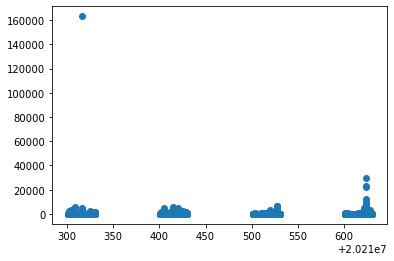

In [5]:
plt.scatter(x_train, y_train)

위를 봤을 때 비어있는 x들이 있는데 이게 아마 시간의 연속이 반영되지 않았기 때문이라 생각했고 datetime 형태로 생각해봐야겠음을 느꼈다.

In [6]:
cluster_0['BKG_DATE2']= pd.to_datetime(cluster_0['BKG_DATE'], format='%Y%m%d')
cluster_0

,Unnamed: 0,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,...,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,cluster_id,BKG_DATE2
0,0,0,7,20210303,35510,22400.000000,134265392,1,14900.000000,1.0,...,5Z73,1,3.0,N,세종특별자치시,S,서울특별시,서대문구,0,2021-03-03
1,1,0,7,20210301,111910,119900.000000,134265392,4,59600.000000,1.0,...,5E04,0,14.0,N,세종특별자치시,S,경기도,광명시,0,2021-03-01
2,2,0,7,20210301,115608,14900.000000,134265392,1,14900.000000,1.0,...,5F40,2t,42.0,N,세종특별자치시,S,대구광역시,달서구,0,2021-03-01
3,3,0,7,20210303,33257,29800.000000,134265392,2,29800.000000,1.0,...,6P95,7,37.0,N,세종특별자치시,S,경상북도,포항시,0,2021-03-03
4,4,0,7,20210304,5740,29800.000000,134265392,2,29800.000000,1.0,...,8F53,0,39.0,N,세종특별자치시,S,경상북도,김천시,0,2021-03-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741872,1786367,1,7,20210628,91210,73518.623345,00263,100,53957.716636,1.0,...,5F20,1,10.0,N,경기도,군포시,경기도,S,0,2021-06-28
741873,1786368,1,7,20210628,91210,73518.623345,00281,100,53957.716636,1.0,...,5F20,1,10.0,N,경기도,군포시,경기도,S,0,2021-06-28
741874,1786369,1,7,20210628,91210,73518.623345,00316,168,53957.716636,1.0,...,5F20,1,10.0,N,경기도,군포시,경기도,S,0,2021-06-28
741875,1786370,1,7,20210628,91210,73518.623345,00338,100,53957.716636,1.0,...,5F20,1,10.0,N,경기도,군포시,경기도,S,0,2021-06-28


In [7]:
x=cluster_0['BKG_DATE2']
y=cluster_0['ITEM_QTY']

글씨 크기는 언젠가 줄일테다!

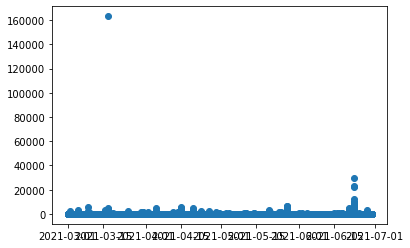

In [8]:
plt.scatter(x, y)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
cluster_0['ITEM_QTY'].max()
cluster_0_max1 = (cluster_0.ITEM_QTY ==163200)
cluster_0[cluster_0_max1]

,Unnamed: 0,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,...,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,cluster_id,BKG_DATE2
415520,873662,0,8,20210317,94945,73518.623345,11830143,163200,0.0,0.0,...,xxxxx,xxxxx,0.0,N,경기,광주시,경기도,S,0,2021-03-17


In [11]:
cluster_0_max1 = (cluster_0.ITEM_CD=='11830143')
cluster_0[cluster_0_max1]

,Unnamed: 0,CORP_ID,BKG_TYP,BKG_DATE,BKG_TIME,INV_AMT,ITEM_CD,ITEM_QTY,ITEM_AMT,DLV_DV,...,DLVCLSFCD,DLVSUBCLSFCD,POST_ZONE,SPLIT_EXEC_YN,SHPR_ADDR_1,SHPR_ADDR_2,CNEE_ADDR_1,CNEE_ADDR_2,cluster_id,BKG_DATE2
415520,873662,0,8,20210317,94945,73518.623345,11830143,163200,0.0,0.0,...,xxxxx,xxxxx,0.0,N,경기,광주시,경기도,S,0,2021-03-17


이게 지금 뭐하는거냐면 일단 max값을 가진 애를 3개 찾아내서 그에 해당하는 아이템 품목을 Linear Regression 하려는 목적.

In [12]:
cluster_0_max1 = cluster_0[cluster_0['ITEM_QTY']==163200].index

In [13]:
cluster_0= cluster_0.drop(cluster_0_max1)

In [14]:
cluster_0_max2 = cluster_0['ITEM_QTY'].max()
cluster_0_max2

29400

In [15]:
cluster_0_max2 = cluster_0[cluster_0['ITEM_QTY']==29400].index

In [16]:
cluster_0= cluster_0.drop(cluster_0_max2)

In [17]:
cluster_0['ITEM_QTY'].max()

23000

In [18]:
cluster_0_max3 = cluster_0['ITEM_QTY'].max()
cluster_0_max3 = cluster_0[cluster_0['ITEM_QTY']==23000].index

In [19]:
cluster_0 = cluster_0.drop(cluster_0_max3)

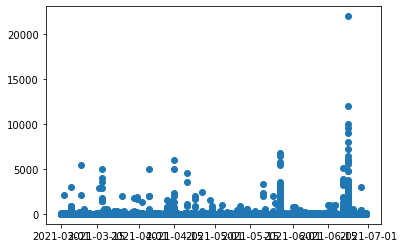

In [20]:
x = cluster_0['BKG_DATE2']
y= cluster_0['ITEM_QTY']
plt.scatter(x,y)

In [21]:
cluster_0_max1

Int64Index([415520], dtype='int64')

그냥 바로 리니어 리그레션 때리기!

In [42]:
#datetime 은 바로 linear regression을 못쓴다고 함! 그래서 이런식의 변환이 필요
import datetime as dt
cluster_0['BKG_DATE2'] = pd.to_datetime(cluster_0['BKG_DATE2'])
cluster_0['BKG_DATE2']= cluster_0['BKG_DATE2'].map(dt.datetime.toordinal)

In [43]:
y= np.asarray(cluster_0['ITEM_QTY'])
X = cluster_0[['BKG_DATE2']]

In [44]:
X_train, X_test, y_train, y_test = train_test_split             
(X,y,train_size=7,random_state=42)

SyntaxError: invalid syntax (<ipython-input-44-ed5b4a3864a0>, line 2)

### Tensorflow 구현 -> linear regression

In [22]:
import tensorflow as tf
import numpy as np

In [24]:
cluster_0_lr = cluster_0[['ITEM_QTY','BKG_DATE2']]

In [29]:
#data    
list_cluster_0 = cluster_0_lr.values.tolist()

In [33]:
x_data =[]
y_data =[]
for i in range(0,len(list_cluster_0)):
    x_data = list_cluster_0[i][1]
    y_data = list_cluster_0[i][0]

In [36]:
x_data[3]

TypeError: 'Timestamp' object is not subscriptable

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
lr = LinearRegression()

In [47]:
y_target = cluster_0['ITEM_QTY']
X_data = cluster_0['BKG_DATE']
cluster_0.head()
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741874 entries, 0 to 741876
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       741874 non-null  int64  
 1   CORP_ID          741874 non-null  int64  
 2   BKG_TYP          741874 non-null  int64  
 3   BKG_DATE         741874 non-null  int64  
 4   BKG_TIME         741874 non-null  int64  
 5   INV_AMT          741874 non-null  float64
 6   ITEM_CD          741874 non-null  object 
 7   ITEM_QTY         741874 non-null  int64  
 8   ITEM_AMT         741874 non-null  float64
 9   DLV_DV           741874 non-null  float64
 10  DLVPREARRBRANCD  741874 non-null  object 
 11  DLVCLSFCD        741874 non-null  object 
 12  DLVSUBCLSFCD     741874 non-null  object 
 13  POST_ZONE        741874 non-null  float64
 14  SPLIT_EXEC_YN    741874 non-null  object 
 15  SHPR_ADDR_1      741874 non-null  object 
 16  SHPR_ADDR_2      741874 non-null  obje

In [48]:
from sklearn import linear_model

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state =156)

In [50]:
linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(X = pd.DataFrame(X_train), y=y_train)
linear_regression_model_prediction = linear_regression_model.predict(X = pd.DataFrame(X_data))

In [52]:
model = LinearRegression() #create linear regression object
model.fit(X_train, y_train) #train model on train data
model.score(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[20210613 20210517 20210327 ... 20210607 20210425 20210525].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [51]:
fig = plt.figure(figsize =(12,4))
graph = fig.add_subplot
graph.plot(YY_data)

AttributeError: 'function' object has no attribute 'plot'

<Figure size 864x288 with 0 Axes>

In [ ]:
lr=LinearRegression
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

In [ ]:
fig, axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features = 